In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newdataset/updated_time_control_rest.csv


In [54]:
!pip install chess

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, BatchNormalization, Bidirectional, Input, Attention
import tensorflow as tf

In [56]:

# Load the dataset
data = pd.read_csv('/kaggle/input/newdataset/updated_time_control_rest.csv')


In [57]:
data.head()

,White,Black,Result,TimeControl,WhiteMoves,BlackMoves,WhiteTimes,BlackTimes,TotalSeconds,FormattedTime
0,"Donchenko, Alexander","Goltseva, Ekaterina",1-0,180+1,"['e4', 'Nf3', 'Nc3', 'exd5', 'Bc4', 'bxc3', 'O...","['c5', 'Nf6', 'd5', 'Nxd5', 'Nxc3', 'e6', 'Be7...","['0:03:00', '0:02:59', '0:02:58', '0:02:58', '...","['0:02:56', '0:02:55', '0:02:54', '0:02:55', '...",181.0,3.0m 1.0s
1,"Donchenko, Alexander","Semenenko, Dmytry",1-0,180+1,"['e4', 'e5', 'd4', 'c4', 'exd6', 'Nc3', 'h3', ...","['Nf6', 'Nd5', 'd6', 'Nb6', 'cxd6', 'g6', 'Bg7...","['0:03:00', '0:02:59', '0:03:00', '0:03:00', '...","['0:02:59', '0:03:00', '0:03:00', '0:03:00', '...",181.0,3.0m 1.0s
2,"Donchenko, Alexander","Ragger, Markus",1-0,40/5400+30:1800+30,"['d4', 'c4', 'Nc3', 'Nf3', 'cxd5', 'e4', 'bxc3...","['Nf6', 'g6', 'd5', 'Bg7', 'Nxd5', 'Nxc3', 'c5...","['1:30:55', '1:31:12', '1:31:29', '1:31:51', '...","['1:30:55', '1:31:22', '1:31:50', '1:32:15', '...",1860.0,31.0m 0.0s
3,"Donchenko, Alexander","Sjugirov, Sanan",1-0,180+2,"['e4', 'Nf3', 'Bb5', 'O-O', 'c3', 'Re1', 'd4',...","['c5', 'Nc6', 'g6', 'Bg7', 'Nf6', 'O-O', 'd5',...","['0:03:00', '0:03:01', '0:03:01', '0:03:00', '...","['0:02:59', '0:02:59', '0:02:59', '0:03:00', '...",182.0,3.0m 2.0s
4,"Donchenko, Alexander","Yurtseven, Melih",1-0,180+2,"['e4', 'Nf3', 'Bb5', 'Ba4', 'c3', 'd4', 'O-O',...","['e5', 'Nc6', 'a6', 'Nge7', 'd6', 'Bd7', 'Ng6'...","['0:02:58', '0:02:57', '0:02:57', '0:02:57', '...","['0:03:00', '0:03:00', '0:03:01', '0:03:01', '...",182.0,3.0m 2.0s


In [58]:
data.tail()

,White,Black,Result,TimeControl,WhiteMoves,BlackMoves,WhiteTimes,BlackTimes,TotalSeconds,FormattedTime
34932,"Yu, Yangyi","Suleyev, Alen",1-0,180+2,"['e4', 'e5', 'd4', 'Nf3', 'h3', 'Nxe5', 'Be2',...","['Nf6', 'Nd5', 'd6', 'Nb6', 'dxe5', 'g6', 'Bg7...","['0:03:03', '0:03:04', '0:03:05', '0:03:06', '...","['0:02:54', '0:02:55', '0:02:56', '0:02:57', '...",182.0,3.0m 2.0s
34933,"Yu, Yangyi","Suleimen, Ergali",1-0,180+2,"['e4', 'Nf3', 'Bb5+', 'a4', 'Nc3', 'O-O', 'e5'...","['c5', 'd6', 'Bd7', 'Nf6', 'e6', 'Be7', 'dxe5'...","['0:03:03', '0:03:04', '0:03:04', '0:03:05', '...","['0:03:03', '0:03:02', '0:03:03', '0:02:55', '...",182.0,3.0m 2.0s
34934,"Yu, Yangyi","Lysakov, Anton",1-0,180+2,"['e4', 'd4', 'Nc3', 'e5', 'Bd2', 'Nb5', 'Qg4',...","['e6', 'd5', 'Bb4', 'c5', 'cxd4', 'Be7', 'g6',...","['0:03:03', '0:03:02', '0:03:02', '0:03:03', '...","['0:03:03', '0:03:04', '0:03:05', '0:03:06', '...",182.0,3.0m 2.0s
34935,"Yu, Yangyi","Araujo Sanchez, Josue",1-0,5400+30,"['e4', 'd4', 'Nd2', 'e5', 'Ngf3', 'dxc5', 'h3'...","['c6', 'a6', 'd5', 'c5', 'Nc6', 'Bg4', 'Bxf3',...","['1:30:56', '1:30:57', '1:29:54', '1:29:59', '...","['1:27:52', '1:25:50', '1:25:59', '1:25:42', '...",5430.0,1.0h 30.0m 30.0s
34936,"Yu, Yangyi","Sargissian, Gabriel",1-0,5400+30,"['c4', 'Nc3', 'd4', 'cxd5', 'Bg5', 'e3', 'Bh4'...","['e6', 'd5', 'Nf6', 'exd5', 'c6', 'h6', 'Be7',...","['1:30:55', '1:31:12', '1:31:31', '1:31:30', '...","['1:30:29', '1:30:26', '1:30:36', '1:30:50', '...",5430.0,1.0h 30.0m 30.0s


In [59]:
data.shape

(34937, 10)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34937 entries, 0 to 34936
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   White          34937 non-null  object 
 1   Black          34937 non-null  object 
 2   Result         34937 non-null  object 
 3   TimeControl    34295 non-null  object 
 4   WhiteMoves     34937 non-null  object 
 5   BlackMoves     34937 non-null  object 
 6   WhiteTimes     34937 non-null  object 
 7   BlackTimes     34937 non-null  object 
 8   TotalSeconds   34295 non-null  float64
 9   FormattedTime  34937 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.7+ MB


In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalSeconds,34295.0,1004.305613,1684.715838,0.0,181.0,182.0,910.0,9900.0


In [62]:
print("Input Data Columns: ", data.columns.tolist())

Input Data Columns:  ['White', 'Black', 'Result', 'TimeControl', 'WhiteMoves', 'BlackMoves', 'WhiteTimes', 'BlackTimes', 'TotalSeconds', 'FormattedTime']


In [63]:
# Print the columns to see what exists
print(data.columns)

Index(['White', 'Black', 'Result', 'TimeControl', 'WhiteMoves', 'BlackMoves',
       'WhiteTimes', 'BlackTimes', 'TotalSeconds', 'FormattedTime'],
      dtype='object')


In [64]:

# Combine WhiteMoves and BlackMoves columns
data['AllMoves'] = data['WhiteMoves'].astype(str) + " " + data['BlackMoves'].astype(str)


In [65]:
data.head()

,White,Black,Result,TimeControl,WhiteMoves,BlackMoves,WhiteTimes,BlackTimes,TotalSeconds,FormattedTime,AllMoves
0,"Donchenko, Alexander","Goltseva, Ekaterina",1-0,180+1,"['e4', 'Nf3', 'Nc3', 'exd5', 'Bc4', 'bxc3', 'O...","['c5', 'Nf6', 'd5', 'Nxd5', 'Nxc3', 'e6', 'Be7...","['0:03:00', '0:02:59', '0:02:58', '0:02:58', '...","['0:02:56', '0:02:55', '0:02:54', '0:02:55', '...",181.0,3.0m 1.0s,"['e4', 'Nf3', 'Nc3', 'exd5', 'Bc4', 'bxc3', 'O..."
1,"Donchenko, Alexander","Semenenko, Dmytry",1-0,180+1,"['e4', 'e5', 'd4', 'c4', 'exd6', 'Nc3', 'h3', ...","['Nf6', 'Nd5', 'd6', 'Nb6', 'cxd6', 'g6', 'Bg7...","['0:03:00', '0:02:59', '0:03:00', '0:03:00', '...","['0:02:59', '0:03:00', '0:03:00', '0:03:00', '...",181.0,3.0m 1.0s,"['e4', 'e5', 'd4', 'c4', 'exd6', 'Nc3', 'h3', ..."
2,"Donchenko, Alexander","Ragger, Markus",1-0,40/5400+30:1800+30,"['d4', 'c4', 'Nc3', 'Nf3', 'cxd5', 'e4', 'bxc3...","['Nf6', 'g6', 'd5', 'Bg7', 'Nxd5', 'Nxc3', 'c5...","['1:30:55', '1:31:12', '1:31:29', '1:31:51', '...","['1:30:55', '1:31:22', '1:31:50', '1:32:15', '...",1860.0,31.0m 0.0s,"['d4', 'c4', 'Nc3', 'Nf3', 'cxd5', 'e4', 'bxc3..."
3,"Donchenko, Alexander","Sjugirov, Sanan",1-0,180+2,"['e4', 'Nf3', 'Bb5', 'O-O', 'c3', 'Re1', 'd4',...","['c5', 'Nc6', 'g6', 'Bg7', 'Nf6', 'O-O', 'd5',...","['0:03:00', '0:03:01', '0:03:01', '0:03:00', '...","['0:02:59', '0:02:59', '0:02:59', '0:03:00', '...",182.0,3.0m 2.0s,"['e4', 'Nf3', 'Bb5', 'O-O', 'c3', 'Re1', 'd4',..."
4,"Donchenko, Alexander","Yurtseven, Melih",1-0,180+2,"['e4', 'Nf3', 'Bb5', 'Ba4', 'c3', 'd4', 'O-O',...","['e5', 'Nc6', 'a6', 'Nge7', 'd6', 'Bd7', 'Ng6'...","['0:02:58', '0:02:57', '0:02:57', '0:02:57', '...","['0:03:00', '0:03:00', '0:03:01', '0:03:01', '...",182.0,3.0m 2.0s,"['e4', 'Nf3', 'Bb5', 'Ba4', 'c3', 'd4', 'O-O',..."


In [66]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Flatten the list of all moves for tokenization
all_moves_combined = data['AllMoves'].tolist()

# Tokenize all moves
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_moves_combined)

# Convert moves to sequences
move_sequences = tokenizer.texts_to_sequences(data['AllMoves'])

# Pad sequences to make them equal length
max_len = max(len(seq) for seq in move_sequences)
move_sequences = pad_sequences(move_sequences, maxlen=max_len, padding='post')


In [67]:
# Tokenize the combined moves
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['AllMoves'])

In [68]:

# Convert moves into sequences of integers
sequences = tokenizer.texts_to_sequences(data['AllMoves'])

In [69]:
# Define maximum length and vocabulary size
max_len = 30  # Adjust as needed
vocab_size = len(tokenizer.word_index) + 1

In [70]:

# Pad sequences to ensure uniform input shape
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [71]:
# Split dataset into train and test sets
X_train, X_test = train_test_split(padded_sequences, test_size=0.2, random_state=42)

In [72]:
# Prepare targets for next move prediction (shifted sequences)
y_train = X_train[:, 1:]  # Target sequences
X_train = X_train[:, :-1]  # Input sequences

In [73]:
y_test = X_test[:, 1:]
X_test = X_test[:, :-1]


In [74]:

# Reshape the targets to match the model's output
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1], 1)

# **Define the Enhanced Model with Bidirectional LSTM and Attention** 

In [75]:
from tensorflow.keras.layers import Bidirectional, Attention


In [76]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, BatchNormalization, Attention, Bidirectional
from tensorflow.keras.models import Model
import tensorflow as tf

# Define input layer with appropriate shape
inputs = Input(shape=(max_len - 1,))

# Embedding layer
x = Embedding(input_dim=vocab_size, output_dim=128)(inputs)

# First LSTM layer with Bidirectional, BatchNormalization, and Dropout
x = Bidirectional(LSTM(units=512, return_sequences=True))(x)
x = BatchNormalization()(x)


# Additional LSTM layer with BatchNormalization and Dropout
x = LSTM(units=256, return_sequences=True)(x)
x = BatchNormalization()(x)

# Additional LSTM layer with BatchNormalization and Dropout
x = LSTM(units=128, return_sequences=True)(x)
x = BatchNormalization()(x)


# Split into query and value for the Attention layer
query = x  # Using LSTM output as both query and value
value = x

# Apply Attention layer
attention_output = Attention()([query, value])

# Dense layer for output
outputs = Dense(vocab_size, activation='softmax')(attention_output)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [77]:
# Model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 29)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 29, 128)   │    548,736 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 29, 1024)  │  2,625,536 │ embedding_1[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 29, 1024)  │      4,096 │ bidirectional_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 29, 256)   │  1,311,744 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 29, 256)   │      1,024 │ lstm_4[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 29, 128)   │    197,120 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 29, 128)   │        512 │ lstm_5[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 29, 128)   │          0 │ batch_normalizat… │
│ (Attention)         │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 29, 4287)  │    553,023 │ attention_1[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,241,791 (20.00 MB)

 Trainable params: 5,238,975 (19.99 MB)

 Non-trainable params: 2,816 (11.00 KB)

>  **Train the Model**

> Data leakage problem

In [78]:

# Convert sequences to tuples (hashable) for set operations
train_sequences = {tuple(seq) for seq in X_train}
test_sequences = {tuple(seq) for seq in X_test}

# Find any overlaps between training and test sets
overlap_sequences = train_sequences.intersection(test_sequences)

# Check if there is any data leakage
if overlap_sequences:
    print(f"Data leakage detected! Number of overlapping sequences: {len(overlap_sequences)}")
    print("Sample of overlapping sequences:", list(overlap_sequences)[:5])  # Display a sample
else:
    print("No data leakage detected between training and test sets.")

Data leakage detected! Number of overlapping sequences: 1671
Sample of overlapping sequences: [(175, 7, 4, 111, 14, 350, 21, 222, 581, 493, 395, 43, 68, 67, 204, 2, 159, 3, 298, 681, 55, 28, 431, 974, 4, 6, 211, 721, 196), (2649, 13, 123, 70, 177, 340, 177, 79, 193, 979, 227, 731, 1, 116, 26, 190, 479, 173, 453, 859, 1538, 607, 1, 127, 720, 85, 177, 95, 569), (200, 191, 490, 412, 266, 374, 14, 385, 302, 153, 241, 6, 375, 121, 84, 266, 95, 87, 69, 652, 162, 285, 143, 321, 468, 1, 354, 281, 71), (496, 239, 80, 215, 21, 32, 69, 103, 84, 115, 113, 843, 302, 18, 17, 14, 178, 30, 456, 80, 287, 243, 151, 202, 27, 388, 388, 464, 183), (43, 204, 222, 68, 783, 47, 437, 301, 12, 6, 41, 288, 214, 771, 1, 79, 274, 336, 274, 449, 2823, 266, 219, 11, 1705, 142, 607, 1, 930)]


In [79]:

# Convert sequences to tuples (hashable) to detect overlaps
train_sequences_set = {tuple(seq) for seq in X_train}
test_sequences_set = {tuple(seq) for seq in X_test}

# Identify overlapping sequences
overlap_sequences = train_sequences_set.intersection(test_sequences_set)
print(f"Number of overlapping sequences: {len(overlap_sequences)}")

# Remove overlapping sequences from both sets
# Step 1: Filter X_train and y_train to exclude overlaps
X_train_filtered = np.array([seq for seq in X_train if tuple(seq) not in overlap_sequences])
y_train_filtered = np.array([target for seq, target in zip(X_train, y_train) if tuple(seq) not in overlap_sequences])

# Step 2: Filter X_test and y_test to exclude overlaps
X_test_filtered = np.array([seq for seq in X_test if tuple(seq) not in overlap_sequences])
y_test_filtered = np.array([target for seq, target in zip(X_test, y_test) if tuple(seq) not in overlap_sequences])

print(f"Training set size after removing overlaps: {X_train_filtered.shape[0]}")
print(f"Testing set size after removing overlaps: {X_test_filtered.shape[0]}")

# Assign filtered data back to X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered

Number of overlapping sequences: 1671
Training set size after removing overlaps: 26215
Testing set size after removing overlaps: 5308


> Data leakage problem

In [80]:

# Convert sequences to tuples (hashable) for set operations
train_sequences = {tuple(seq) for seq in X_train}
test_sequences = {tuple(seq) for seq in X_test}

# Find any overlaps between training and test sets
overlap_sequences = train_sequences.intersection(test_sequences)

# Check if there is any data leakage
if overlap_sequences:
    print(f"Data leakage detected! Number of overlapping sequences: {len(overlap_sequences)}")
    print("Sample of overlapping sequences:", list(overlap_sequences)[:5])  # Display a sample
else:
    print("No data leakage detected between training and test sets.")

No data leakage detected between training and test sets.


In [86]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.7566 - loss: 0.6450 - val_accuracy: 0.7504 - val_loss: 0.6878
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.7742 - loss: 0.6150 - val_accuracy: 0.7640 - val_loss: 0.6638
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7957 - loss: 0.5768 - val_accuracy: 0.7861 - val_loss: 0.6326
Epoch 4/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8208 - loss: 0.5314 - val_accuracy: 0.7992 - val_loss: 0.6099
Epoch 5/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8305 - loss: 0.5162 - val_accuracy: 0.8283 - val_loss: 0.5610
Epoch 6/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8500 - loss: 0.4774 - val_accuracy: 0.8445 - val_loss: 0.5249
Epoch 7/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8707 - loss: 0.4326 - val_accuracy: 0.8487 - val_loss: 0.5202
Epoch 8/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8825 - loss: 0.4056 - 

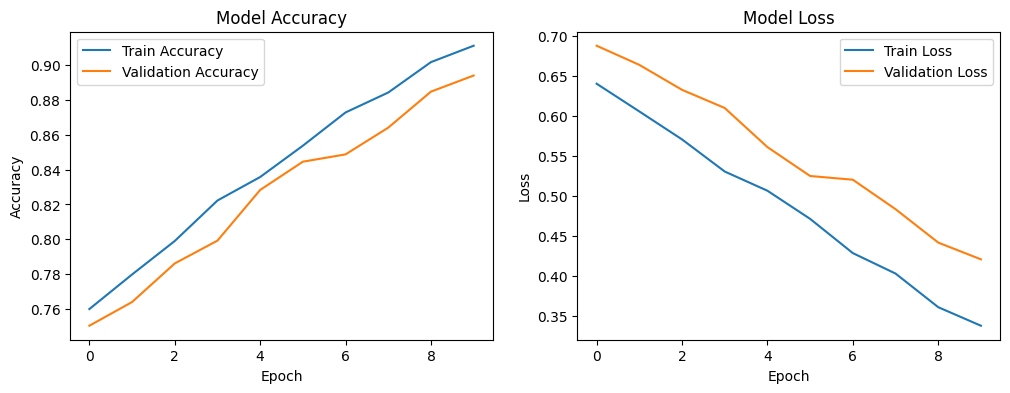

In [87]:
import matplotlib.pyplot as plt

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [85]:
# Predict the next move
predicted_probs = model.predict(X_test[:1])  # Predict for the first test sample

# Get the predicted probabilities for the last timestep
last_timestep_probs = predicted_probs[0, -1, :]  # Take the last time step probabilities

# Get the index of the highest probability
predicted_index = int(np.argmax(last_timestep_probs))  # Convert to integer

# Convert index to move
if predicted_index in tokenizer.index_word:
    predicted_move = tokenizer.index_word[predicted_index]
    print(f"The predicted next move is: {predicted_move}")
else:
    print("Predicted index not found in tokenizer index_word dictionary.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The predicted next move is: 'a5'


In [88]:
# Predict probabilities for the first sample in the test set
predicted_probs = model.predict(X_test[:1])  # Predict for the first test sample

# Get the predicted probabilities for the last timestep
last_timestep_probs = predicted_probs[0, -1, :]  # Take the last time step probabilities

# Get the indices of the top 10 highest probabilities
top_10_indices = np.argsort(last_timestep_probs)[-10:][::-1]  # Sort and take top 10 in descending order

# Convert indices to moves and print them
top_10_moves = []
for index in top_10_indices:
    if index in tokenizer.index_word:
        move = tokenizer.index_word[index]
        top_10_moves.append(move)
        print(f"Move: {move}, Probability: {last_timestep_probs[index]}")
    else:
        print(f"Index {index} not found in tokenizer index_word dictionary.")

print("The top 10 predicted moves are:", top_10_moves)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Move: 'kg8', Probability: 0.07686439156532288
Move: 'kh8', Probability: 0.06059284135699272
Move: 'a5', Probability: 0.02785944566130638
Move: 'bg6', Probability: 0.02105340175330639
Move: 'qc7', Probability: 0.01991814561188221
Move: 'qb4', Probability: 0.019410505890846252
Move: 'qd6', Probability: 0.01761634089052677
Move: 'qb6', Probability: 0.017545120790600777
Move: 'qe7', Probability: 0.014497565105557442
Move: 're8', Probability: 0.01437406800687313
The top 10 predicted moves are: ["'kg8'", "'kh8'", "'a5'", "'bg6'", "'qc7'", "'qb4'", "'qd6'", "'qb6'", "'qe7'", "'re8'"]


In [ ]:
import chess
import numpy as np

# Assume `model` is your trained LSTM model, and `encode_move_sequence` / `decode_move` are helper functions.

def encode_move_sequence(board_moves):
    # Implement this function to encode the sequence of moves for the model
    pass

def decode_move(predicted_move):
    # Implement this function to decode the model's prediction into a move notation
    pass

def get_user_move(board):
    while True:
        try:
            user_move = input("Enter your move in UCI notation (e.g., e2e4): ")
            move = chess.Move.from_uci(user_move)
            if move in board.legal_moves:
                return move
            else:
                print("Illegal move. Try again.")
        except ValueError:
            print("Invalid input. Make sure the move is in UCI format.")

# Initialize the board
board = chess.Board()

# Game loop
while not board.is_game_over():
    # Display the board
    print(board)

    # Get the user move
    user_move = get_user_move(board)
    board.push(user_move)

    # Encode current board moves for the model
    move_sequence = encode_move_sequence(board.move_stack)

    # Reshape move_sequence as needed for the LSTM model's input
    move_sequence = move_sequence.reshape((1, -1, move_sequence.shape[1]))

    # Predict the next move
    predicted_move_encoded = model.predict(move_sequence)
    predicted_move = decode_move(predicted_move_encoded)

    # Play the model's move
    if chess.Move.from_uci(predicted_move) in board.legal_moves:
        board.push(chess.Move.from_uci(predicted_move))
        print(f"Model's move: {predicted_move}")
    else:
        print("Model predicted an illegal move. Ending game.")
        break

    # Check if the game is over
    if board.is_checkmate():
        print("Checkmate!")
        break
    elif board.is_stalemate() or board.is_insufficient_material() or board.is_seventyfive_moves():
        print("Draw!")
        break


In [ ]:
import chess
import numpy as np

# Define or import model, encode_move_sequence, decode_move as per your setup

def encode_move_sequence(board_moves):
    # Implement this function to encode the sequence of moves for the model
    pass

def decode_move(predicted_move):
    # Implement this function to decode the model's prediction into a move notation
    pass

def get_user_move(board):
    while True:
        try:
            user_move = input("Enter your move in UCI notation (e.g., e2e4): ")
            move = chess.Move.from_uci(user_move)
            if move in board.legal_moves:
                return move
            else:
                print("Illegal move. Try again.")
        except ValueError:
            print("Invalid input. Make sure the move is in UCI format.")

# Initialize the board
board = chess.Board()

# Game loop
while not board.is_game_over():
    # Display the board
    print(board)

    # Get the user move
    user_move = get_user_move(board)
    board.push(user_move)

    # Encode current board moves for the model
    move_sequence = encode_move_sequence(board.move_stack)

    # Reshape move_sequence as needed for the LSTM model's input
    move_sequence = move_sequence.reshape((1, -1, move_sequence.shape[1]))

    # Predict the next move
    predicted_move_encoded = model.predict(move_sequence)
    predicted_move = decode_move(predicted_move_encoded)

    # Check if the model's move is legal
    if chess.Move.from_uci(predicted_move) in board.legal_moves:
        board.push(chess.Move.from_uci(predicted_move))
        print(f"Model's move: {predicted_move}")
    else:
        print("Model predicted an illegal move. Ending game.")
        break

    # Debugging output to check game status
    print(f"User's move: {user_move} | Model's move: {predicted_move}")
    
    # Check if the game is over
    if board.is_checkmate():
        print("Checkmate!")
        break
    elif board.is_stalemate() or board.is_insufficient_material() or board.is_seventyfive_moves():
        print("Draw!")
        break
